     Weight  Length1  Length2  Length3   Height   Width
38     87.0     18.2     19.8     22.2   5.6166  3.1746
153     9.8     11.4     12.0     13.2   2.2044  1.1484
3     363.0     26.3     29.0     33.5  12.7300  4.4555
94    150.0     21.0     23.0     24.5   5.2185  3.6260
11    500.0     28.7     31.0     36.2  14.3714  4.8146
..      ...      ...      ...      ...      ...     ...
72      5.9      7.5      8.4      8.8   2.1120  1.4080
8     450.0     27.6     30.0     35.1  14.0049  4.8438
71    300.0     24.0     26.0     29.0  11.3680  4.2340
134   456.0     40.0     42.5     45.5   7.2800  4.3225
135   510.0     40.0     42.5     45.5   6.8250  4.4590

[119 rows x 6 columns]
score:  0.725


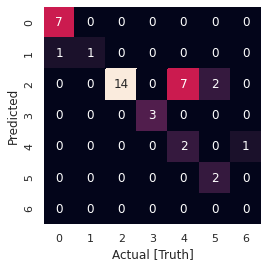

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Fish.csv')

encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

X = data.drop('Species', axis = 1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)
print(X_train)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
rf_y_pred=clf.predict(X_test)
pred_prob_rf = clf.predict_proba(X_test)
print("score: ",clf.score(X_test, y_test))

rf_metro = confusion_matrix(rf_y_pred, y_test)
rf_names_metro = np.unique(y_test)
sns.heatmap(rf_metro, square=True, annot=True, fmt='d', cbar=False, xticklabels= rf_names_metro, yticklabels=rf_names_metro)
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')
plt.show()

In [15]:
import pickle
pickle_out = open('fish_class.pkl','wb')
pickle.dump(clf, pickle_out)
pickle_out.close()

In [13]:
prediction = clf.predict([[339,25,25,25,12,5]]);
if (prediction[0] == 0):
    print('Bream')
elif (prediction[0] == 1):
    print('Parkki')
elif (prediction[0] == 2):
    print('Perch')
elif (prediction[0] == 3):
    print('Pike')
elif (prediction[0] == 4):
    print('Roach')
elif (prediction[0] == 5):
    print('Smelt')                      
else:
    print('Whitefish')


Parkki
